In [14]:
#install.packages("corrplot")
#install.packages("viridisLite") 
#install.packages("viridis")
#install.packages("Hmisc")
#install.packages("corrgram")
library("corrgram")
library("corrplot")
library("Hmisc")
library("dplyr")
library("limma")

In [5]:
scx = read.csv("../csv/sc_xtandem_proteinCounts.csv",head=T)
scx = scx[-1]
names(scx) = c("protein",paste0("scx_",names(scx)[-1]))
head(scx)

protein,scx_JD_06232014_sample4_Cn_proteins,scx_JD_06232014_sample4_Cprotein_score,scx_JD_06232014_sample4_Cn_peptides,scx_JD_06232014_sample4_Cabundance,scx_JD_06232014_sample3_C_n_proteins,scx_JD_06232014_sample3_C_protein_score,scx_JD_06232014_sample3_C_n_peptides,scx_JD_06232014_sample3_C_abundance,scx_JD_06232014_sample2_A_n_proteins,⋯,scx_JD_06232014_sample3_A_n_peptides,scx_JD_06232014_sample3_A_abundance,scx_JD_06232014_sample4.A_n_proteins,scx_JD_06232014_sample4.A_protein_score,scx_JD_06232014_sample4.A_n_peptides,scx_JD_06232014_sample4.A_abundance,scx_JD_06232014_sample2_B_n_proteins,scx_JD_06232014_sample2_B_protein_score,scx_JD_06232014_sample2_B_n_peptides,scx_JD_06232014_sample2_B_abundance
sp|D6VTK4|STE2_YEAST,1,1.0000000,5,5,1,1.0000000,5,5,1,⋯,5,5,1,1,5,5,1,1.0000000,5,5
sp|O13297|CET1_YEAST,1,1.0000000,4,4,1,1.0000000,4,4,1,⋯,4,4,1,1,5,5,1,1.0000000,7,8
sp|O13516|RS9A_YEAST,1,1.0000000,1,1,1,1.0000000,1,1,1,⋯,1,1,1,1,1,1,1,1.0000000,1,1
sp|O13547|CCW14_YEAST,1,1.0000000,2,4,1,1.0000000,2,4,1,⋯,2,4,1,1,2,4,1,1.0000000,2,3
sp|O13563|RPN13_YEAST,1,1.0000000,2,2,1,1.0000000,3,3,1,⋯,3,4,1,1,2,2,1,1.0000000,4,4
sp|O13585|YP089_YEAST,1,0.9999803,1,1,1,0.9999803,1,1,1,⋯,1,1,NA,NA,NA,NA,1,0.9999803,1,1


In [7]:
grep("^# Files*","../csv/ffc_xtandem_proteinIntensities.csv",value=T)

getColumnNames = function(filepath) {
  con = file(filepath, "r")
 a = 0 
  while ( TRUE ) {
    a = a+1
    line = readLines(con, n = 1)
    if ( length(line) == 0 ) {
      break
    } else if (length(grep("# Files/samples associated with abundance values below: ",line)) > 0) {
        tmpline = gsub("# Files/samples associated with abundance values below: ","",line)
        linestrip = unlist(strsplit(tmpline,","))
        #print(linestrip)
        for (i in 1:length(linestrip)) { 
            #print(linestrip[i])
            tmpline = gsub("^ ","",linestrip[i])
            #print(tmpline)
            linestrip[i] = gsub("^.*\\/.*\\/(.*)\\/.*","\\1",tmpline)
  }
        break
    }
        
  }

    close(con)
    return (linestrip)
}





character(0)

In [8]:

filepaths = c("../csv/ffc_xtandem_proteinIntensities.csv",
              "../csv/ffm_xtandem_proteinIntensities.csv",
              "../csv/ffidi_xtandem_proteinIntensities.csv",
              "../csv/ffc_msgfplus_proteinIntensities.csv",
              "../csv/ffm_msgfplus_proteinIntensities.csv",
              "../csv/ffidi_msgfplus_proteinIntensities.csv"
             )
for (i in 1:length(filepaths)) {
    filepath = filepaths[i]
    fftype = gsub("^.*\\/(.*)_(.*)_.*","\\1_\\2_",filepath)
    #print(fftype)
    ff = read.table(filepath,head=T,stringsAsFactors=F)
    #print(head(ff))
    names(ff) = c(names(ff[1]),paste0(fftype, c(names(ff[2:4]),getColumnNames(filepath))))
    #print(names(ff))
    
    if (i == 1) ffj = ff
    else ffj = full_join(ffj,ff,by="protein")
    
}
head(ffj)


protein,ffc_xtandem_n_proteins,ffc_xtandem_protein_score,ffc_xtandem_n_peptides,ffc_xtandem_JD_06232014_sample4_C,ffc_xtandem_JD_06232014_sample3_C,ffc_xtandem_JD_06232014_sample2_A,ffc_xtandem_JD_06232014_sample2_C,ffc_xtandem_JD_06232014_sample3_B,ffc_xtandem_JD_06232014_sample4_B,⋯,ffidi_msgfplus_JD_06232014_sample2_A,ffidi_msgfplus_JD_06232014_sample2_C,ffidi_msgfplus_JD_06232014_sample3_B,ffidi_msgfplus_JD_06232014_sample4_B,ffidi_msgfplus_JD_06232014_sample1_B,ffidi_msgfplus_JD_06232014_sample1_C,ffidi_msgfplus_JD_06232014_sample1-A,ffidi_msgfplus_JD_06232014_sample3_A,ffidi_msgfplus_JD_06232014_sample4-A,ffidi_msgfplus_JD_06232014_sample2_B
sp|D6VTK4|STE2_YEAST,1,1.0000000,5,290268500,329068100,385425600,312576000,348412996,352470100,⋯,1662012536,1483351952,1440585528,1661549904,1952373800,1456803052,1356893800,1271998404,1794669704,1867917648
sp|O13297|CET1_YEAST,1,1.0000000,6,118700600,83701500,135889200,120777700,144378600,123627400,⋯,162271500,157232100,248017800,183155900,355262700,249780600,201673090,156348610,154572400,250834700
sp|O13329|FOB1_YEAST,1,0.9999938,2,7226980,0,34929140,31849010,5745030,5734320,⋯,0,12903400,10950100,0,10575700,11162800,0,26475100,0,26314800
sp|O13515|YA034_YEAST,1,0.1604198,1,0,99177696,80289000,0,0,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
sp|O13516|RS9A_YEAST,1,1.0000000,1,46545900,59508700,36443000,60347400,53226900,39296200,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
sp|O13521|YP035_YEAST,1,0.1629821,1,168850000,174526000,111573000,151418000,255892000,126187000,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


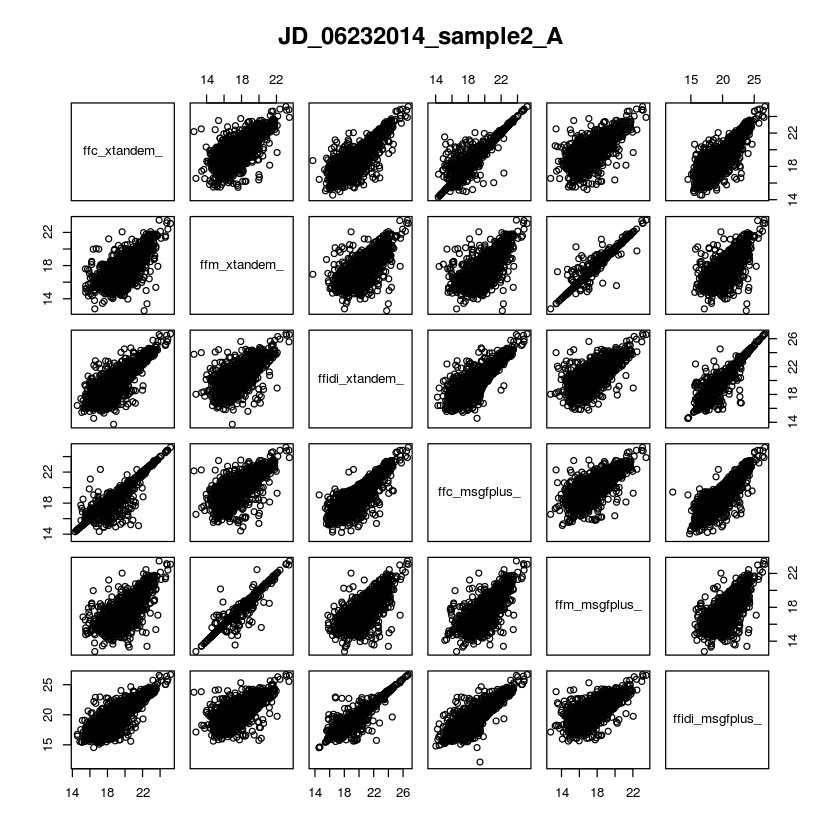

In [9]:
#names(ffj)
sample = "JD_06232014_sample2_A"
tdf = log(ffj[,grep(sample,names(ffj),value=T)])
names(tdf) = gsub(sample,"",names(tdf))
pairs(tdf,main=sample)


                ffc_xtandem_ ffm_xtandem_ ffidi_xtandem_ ffc_msgfplus_
ffc_xtandem_            1.00         0.32           0.53          0.85
ffm_xtandem_            0.32         1.00           0.26          0.29
ffidi_xtandem_          0.53         0.26           1.00          0.55
ffc_msgfplus_           0.85         0.29           0.55          1.00
ffm_msgfplus_           0.34         0.89           0.26          0.33
ffidi_msgfplus_         0.47         0.24           0.78          0.54
                ffm_msgfplus_ ffidi_msgfplus_
ffc_xtandem_             0.34            0.47
ffm_xtandem_             0.89            0.24
ffidi_xtandem_           0.26            0.78
ffc_msgfplus_            0.33            0.54
ffm_msgfplus_            1.00            0.28
ffidi_msgfplus_          0.28            1.00

n
                ffc_xtandem_ ffm_xtandem_ ffidi_xtandem_ ffc_msgfplus_
ffc_xtandem_            3169         1683           3100          2935
ffm_xtandem_            1683        

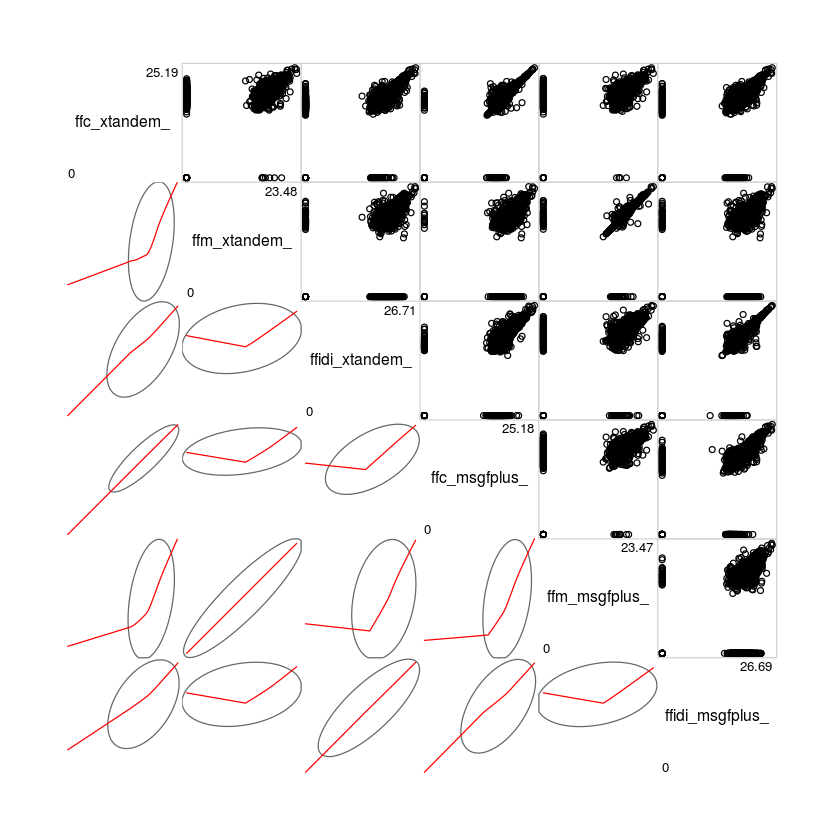

In [10]:
tdf[tdf == -Inf] <- 0
tdf_cor = rcorr(as.matrix(tdf))
tdf_cor
#summary(tdf)
corrgram(tdf,
         lower.panel=panel.ellipse,
         upper.panel=panel.pts, diag.panel=panel.minmax
        )

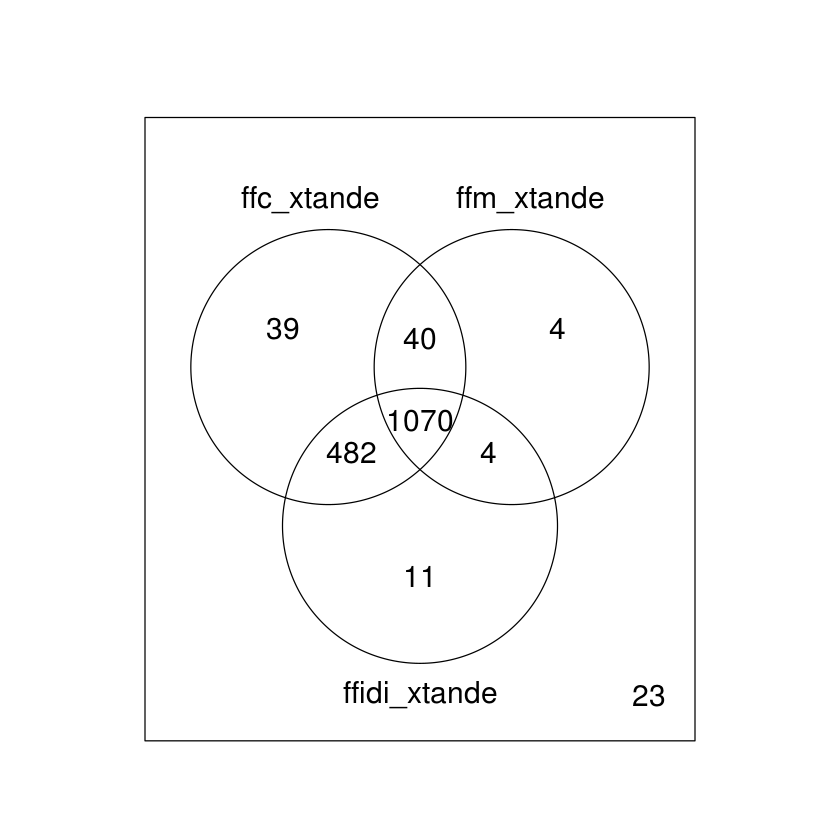

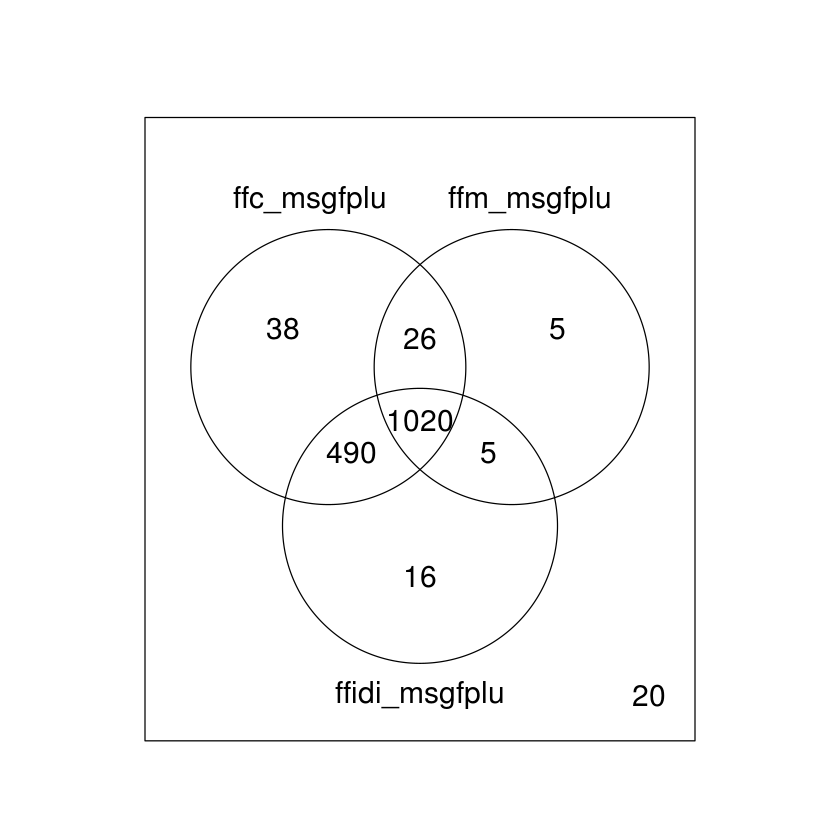

In [19]:
#names(ffj)
sample = "m_JD_06232014_sample2_A"
vdf = ffj[,grep(sample,names(ffj),value=T)]
names(vdf) = gsub(sample,"",names(vdf))
a = vennCounts(vdf)
vennDiagram(a)

sample = "s_JD_06232014_sample2_A"
vdfm = ffj[,grep(sample,names(ffj),value=T)]
names(vdfm) = gsub(sample,"",names(vdfm))
b = vennCounts(vdfm)
vennDiagram(b)

In [ ]:
ve